In [1]:
# import required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# download fashion mnist dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# view the shape of the dataset
train_images.shape

(60000, 28, 28)

In [4]:
# view the target data
train_labels.shape

(60000,)

In [5]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Lable: 9
Image data: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 2

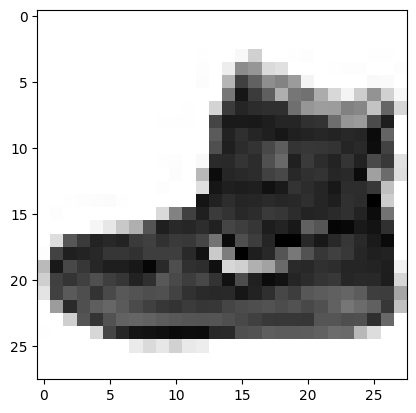

In [6]:
# visualize the data

np.set_printoptions(linewidth=320)

# print the first image and its label
print(f"Lable: {train_labels[0]}")
print(f"Image data: {train_images[0]}")

plt.imshow(train_images[0], cmap='Greys')

In [7]:
# normalize the data
train_images = train_images / 255.0
test_images = test_images / 255.0

In [8]:
# building the model 
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [10]:
class CallBackCustom(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.99:
            print("Reached 90 pct accuracy so cancelling training!")
            self.model.stop_training = True


In [11]:
# compile the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [12]:
model.fit(train_images, train_labels, epochs=10, callbacks=[CallBackCustom()])

Epoch 1/10
1875/1875 [==============================] - 28s 8ms/step - loss: 0.4620 - accuracy: 0.8310
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3037 - accuracy: 0.8887
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2548 - accuracy: 0.9057
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2227 - accuracy: 0.9169
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1970 - accuracy: 0.9263
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1762 - accuracy: 0.9336
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1566 - accuracy: 0.9411
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1418 - accuracy: 0.9458
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1258 - accuracy: 0.9524
Epoch 10/10
1875/1875 [==============================] - 14s 8ms/step - l

In [13]:
# evaluate the model
model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 7ms/step - loss: 0.3031 - accuracy: 0.9067


[0.3030509352684021, 0.9067000150680542]

In [14]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 36ms/step


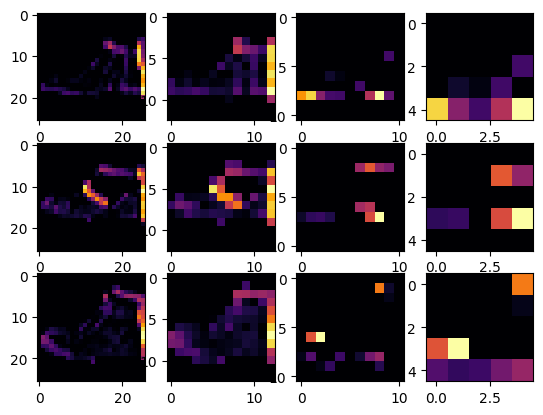

In [16]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 2

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)